In [50]:
from sklearn import datasets

In [51]:
iris = datasets.load_iris()

In [52]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [53]:
import pandas as pd
#set = '/home/cesar/anaconda2/envs/py2/lib/python2.7/site-packages/sklearn/datasets/data/iris.csv'
#iris_csv = pd.read_csv(set)

In [54]:
df=pd.read_csv('iris-data-set.csv')
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [57]:
iris-data-set.csv.head()

ValueError: Unable to coerce to Series, length must be 5: given 6

In [58]:
iris-data-set.csv.tail()

ValueError: Unable to coerce to Series, length must be 5: given 6

In [42]:
data = pd.DataFrame({'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
from sklearn.model_selection import train_test_split
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y = data['species']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


In [16]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

In [18]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
y_pred = clf.predict(X_test)

In [20]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [21]:
# Prediction for a single item
clf.predict([[2, 3, 4, 2]])

array([2])

In [22]:
### Means Virginica

In [23]:
feature_importance = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_importance

petal width (cm)     0.455170
petal length (cm)    0.418749
sepal length (cm)    0.086487
sepal width (cm)     0.039594
dtype: float64

In [24]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

No handles with labels found to put in legend.


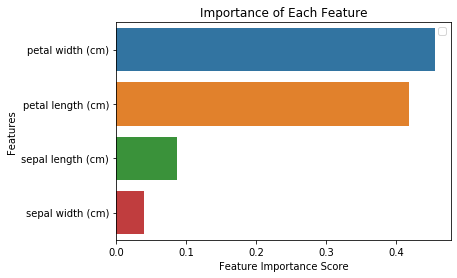

In [26]:
%matplotlib inline
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Importance of Each Feature')
plt.legend()
plt.show()

In [27]:
# let's remove the feature that's almost irrelevant for the prediction 
X = data[['sepal length', 'petal length', 'petal width']]  # Features
y = data['species']  # Labels

In [28]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
print('Accuracy', metrics.accuracy_score(y_test, y_pred))

Accuracy 0.9555555555555556
